# Employee Exit Survey

## The Client
TAFE and DETE are vocational colleges in Australia. They have been doing exit surveys for a while and have now gathered a dataset of about 1600 results which they would like analysed. The client is focussed on internal contributing factors.

## Aims of Analysis: Dissatisfaction
The client has asked for a report to help them understand the results of their recent exit survey.

They wish to understand the profile of employees who cite dissatisfaction as a contributing factor to their exit from the organisation.

Leadership wants to understand where to target retention improvement strategies.

# Visualisations

The correlation analysis determined men are more likely to be dissatisfied than women. They make up about 30% of the workforce, but cite dissatisfaction as a contributing factor to their leaving DETE or TAFE 7% more often than women.

## A Story in Pie Charts

Pie charts make an excellent visualisation tool.

At the end of this notebook there is a useful infographic to communicate the above analysis.

The series of pie charts progress the viewer left to right from the gender disribution in the whole workforce, to the dissatisfied gender distribution, and then to a chart which explodes the key statistic.

## Notebooks and Reports
The following notebooks and documents are part of this anaylsis:

### Jupyter Notebook Filename: Summary
- [employee_exit_survey_cleaning_1.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_cleaning_1.ipynb): Columns drops, missing data, renaming columns, tidying data for consistency
- [employee_exit_survey_cleaning_2.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_cleaning_2.ipynb): Adding calculated columns, adding category columns, further drops
- [employee_exit_survey_correlation.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_correlation.ipynb): Investigating correlations to guide analysis
- [employee_exit_survey_gender.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_gender.ipynb): Aggregation by pivot_table of gender subsets, visualisations
- [employee_exit_survey_age.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_age.ipynb): Aggregation by pivot_table of age subsets, visualisations
- [employee_exit_survey_conflict.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_conflict.ipynb): Exploration of conflict as a contributory factor

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np

In [17]:
exit_survey = pd.read_csv('employee_exit_survey_clean_final.csv')

In [18]:
pv_gender = exit_survey.pivot_table(values='cf_dept_or_job_dissatisfaction', index='gender', aggfunc=np.sum, margins=True)

In [27]:
pv_gender['perc_gender'] = (pv_gender['cf_dept_or_job_dissatisfaction']/pv_gender['cf_dept_or_job_dissatisfaction'].sum())*100

all_gender = exit_survey['gender'].value_counts()

pv_gender['all_perc_gender'] = (all_gender/all_gender.sum())*100
#pv_gender.drop('All', axis=0, inplace=True)

pv_gender

,cf_dept_or_job_dissatisfaction,perc_gender,all_perc_gender
gender,,,
Female,149,30.912863,68.569554
Male,92,19.087137,31.430446


<AxesSubplot:ylabel='perc_gender'>

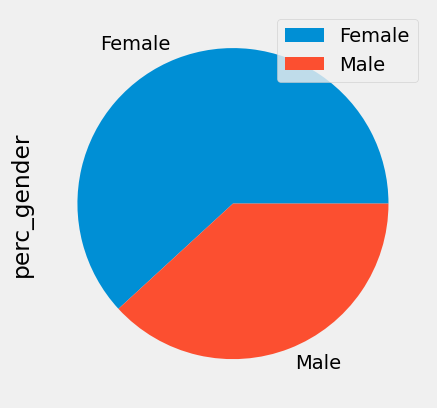

In [28]:
pv_gender.plot(kind='pie', y='perc_gender')

<AxesSubplot:ylabel='all_perc_gender'>

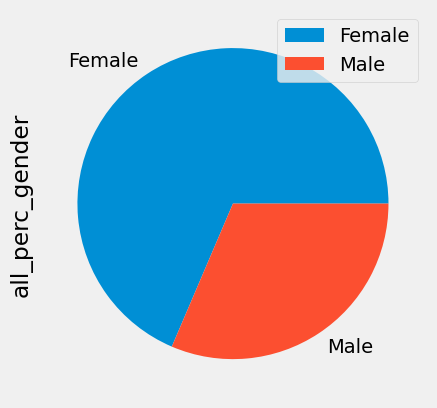

In [29]:
pv_gender.plot(kind='pie', y='all_perc_gender')

In [30]:
diff = pv_gender.loc['Male','all_perc_gender'] - pv_gender.loc['Male','perc_gender']
gender_diff = {'cf_dept_or_job_dissatisfaction':0, 'perc_gender':0, 'all_perc_gender': diff}
df_row = pd.DataFrame(data=gender_diff, index=['Male_x'])
pv_gender_diff = pv_gender

pv_gender_diff = pd.concat([pv_gender_diff,df_row])
pv_gender_diff

,cf_dept_or_job_dissatisfaction,perc_gender,all_perc_gender
Female,149,30.912863,68.569554
Male,92,19.087137,31.430446
Male_x,0,0.000000,12.343309


<AxesSubplot:ylabel='all_perc_gender'>

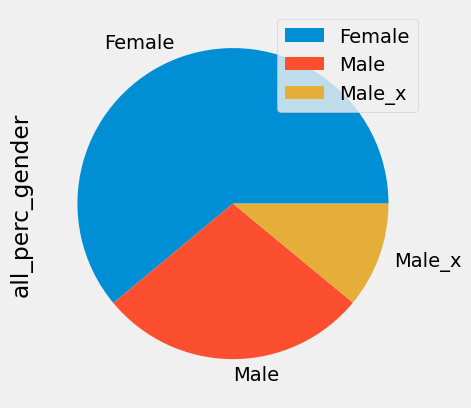

In [31]:
pv_gender_diff.plot(kind='pie', y='all_perc_gender')

In [70]:
# fig1, (ax1,ax2,ax3) = plt.subplots(ncols=3, nrows=1, figsize=((12,5)))

style.use('default')
style.use('fivethirtyeight')

explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

ax1.pie(x=pv_gender['all_perc_gender'], startangle=23)
ax2.pie(x=pv_gender['perc_gender'], startangle=47)
ax3.pie(x=pv_gender_diff['all_perc_gender'], startangle=39, explode=explode)

ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')


ax1.text(x=-1, y=1.2, s='Employee Dissatisfaction by Gender',size=35,color='#8b8b8b', weight='bold')
x_pos = 0.4
y_pos = -0.3

axes=[ax1,ax2,ax3]

for ax in axes:
    ax.text(x=x_pos, y=y_pos, s='M', size=15,color='white')
    ax.text(x=x_pos-1, y=y_pos, s='F',size=15,color='white')

explode_value = str(round(diff))+'%'
    
ax3.text(x=0.6, y=0.25, s=explode_value,size=14, weight='bold',color='black')

ax1.text(x=-0.7, y=-1.5, s='Gender Split\nTAFE & DETE', size=20,color='#8b8b8b', weight='bold')
ax2.text(x=-0.7, y=-1.5, s='Gender Split\nDissatisfied', size=20,color='#8b8b8b', weight='bold')
ax3.text(x=-0.7, y=-1.5, s='Gender Most\nDissatisfied', size=20,color='#8b8b8b', weight='bold')

ax1.text(x=-1.2, y=-1.9, s='James Holiday-Scott, 2021' + ' '*166, backgroundcolor='grey', color='white', size=11)


plt.show()